<a href="https://colab.research.google.com/github/safakozdek/CMPE462-Machine-Learning-Homeworks/blob/master/Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CMPE 462 HOMEWORK 2


In [0]:
# Allowed Libraries
import numpy as np
import matplotlib.pyplot as plt

# Part 1: Dimensionality Reduction

# A: Creating Datasets
Steps:
* Generate 500 points from $\frac{x^2}{2^2}+ \frac{y^2}{5^2} \le 1$(From ellipse with 2, 5 radius on the x and y axes respectively). Example way:
    - Generate 500 angle values $\{\theta^t\}$ in range $[-\pi,+\pi]$
    - Generate 500 values $\{r^t\}$ in range $[0,1]$
    - Generate 500 points $\{x^t,y^t\}$ where $x^t = 2r^tsin(\theta^t)$ and $y^t = 5r^tcos(\theta^t)$.
* Generate 3 set of labels. Do it by dividing data using following Lines (eg. one side of line is label 0, other side is label 1)
    - $y=0$ line
    - $x=0$ line 
    - $y=3x +1$ line 
* Visualize points with each set of labels in subplots with 1 row, 3 columns where each column corresponds to one set of labels. (Use different colors for each label.)  

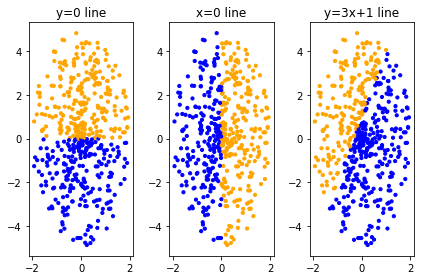

In [0]:
angles = [np.random.uniform(-np.pi, np.pi) for i in range(500)]
rt = [np.random.uniform(0,1) for i in range(500)]
xt = 2*np.sin(angles)*rt
yt = 5*np.cos(angles)*rt

plot1 = plt.subplot(1, 3, 1)
plot1.set_title("y=0 line")
eq1 = [1 if yt[i] >= 0 else 0 for i in range(500)]
plt.scatter(xt, yt, s=10, c=['orange' if eq1[i] == 1 else 'blue' for i in range(500)])

plot2 = plt.subplot(1, 3, 2)
plot2.set_title('x=0 line')
eq2 = [1 if xt[i] >= 0 else 0 for i in range(500)]
plt.scatter(xt, yt, s=10, c=['orange' if eq2[i] == 1 else 'blue' for i in range(500)])

plot3 = plt.subplot(1, 3, 3)
plot3.set_title('y=3x+1 line')
eq3 = [1 if yt[i] >= 3*xt[i] + 1 else 0 for i in range(500)]
plt.scatter(xt, yt, s=10, c=['orange' if eq3[i] == 1 else 'blue' for i in range(500)])

plt.tight_layout()
plt.show()

# B: Applying PCA
Steps:
* Write PCA function.
* Apply PCA to data you generated.
* Visualize each set of labels using first principle component. 
* Visualize each set of labels using second principle component. 

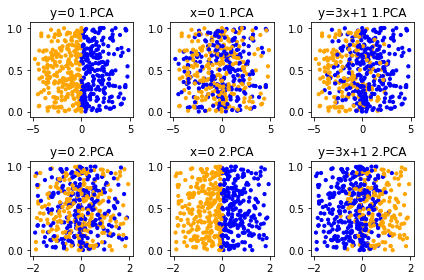

In [0]:
from numpy import linalg as la

a = xt
b = yt
a = np.asarray(a)
b = np.asarray(b)
xtt = np.reshape(a, (1, 500))
ytt = np.reshape(b, (1, 500))

matrix = np.concatenate((xtt,ytt))
cov_matrix = np.cov(matrix)
eig_vals, eig_vecs = la.eig(cov_matrix)
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)

arr1 = np.asarray(eig_pairs[0][1])
arr2 = np.asarray(eig_pairs[1][1])

x1 = np.dot(arr1.T, matrix)
x2 = np.dot(arr2.T, matrix)
y = np.random.rand(1,500)


plot11 = plt.subplot(2, 3, 1)
plot11.set_title('y=0 1.PCA')
plt.scatter(x1, y, s=10, c=['orange' if eq1[i] == 1 else 'blue' for i in range(500)])

plot12 = plt.subplot(2, 3, 2)
plot12.set_title('x=0 1.PCA')
plt.scatter(x1, y, s=10, c=['orange' if eq2[i] == 1 else 'blue' for i in range(500)])

plot13 = plt.subplot(2, 3, 3)
plot13.set_title('y=3x+1 1.PCA')
plt.scatter(x1, y, s=10, c=['orange' if eq3[i] == 1 else 'blue' for i in range(500)])

plot21 = plt.subplot(2, 3, 4)
plot21.set_title('y=0 2.PCA')
plt.scatter(x2, y, s=10, c=['orange' if eq1[p] == 1 else 'blue' for p in range(500)])

plot22 = plt.subplot(2, 3, 5)
plot22.set_title('x=0 2.PCA')
plt.scatter(x2, y, s=10, c=['orange' if eq2[p] == 1 else 'blue' for p in range(500)])

plot23 = plt.subplot(2, 3, 6)
plot23.set_title('y=3x+1 2.PCA')
plt.scatter(x2, y, s=10, c=['orange' if eq3[p] == 1 else 'blue' for p in range(500)])

plt.tight_layout()
plt.show()

# C: Applying LDA
Steps:
* Apply LDA(https://scikit-learn.org/stable/modules/lda_qda.html) to data for each label set. You can use sklearn implementation.
* Visualize each set of labels using first component of corresponding LDA. 

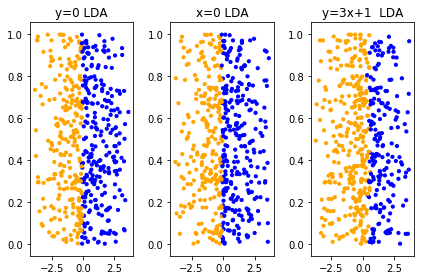

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda

lda = lda(priors=None, shrinkage=None, solver='svd', n_components=2,)

lda1 = lda.fit(matrix.T, eq1).transform(matrix.T)
plot_lda_1 = plt.subplot(1, 3, 1)
plot_lda_1.set_title('y=0 LDA')
plt.scatter(lda1, y, s=10, c=['orange' if eq1[i] == 0 else 'blue' for i in range(500)])

lda2 = lda.fit(matrix.T, eq2).transform(matrix.T)
plot_lda_2 = plt.subplot(1, 3, 2)
plot_lda_2.set_title('x=0 LDA')
plt.scatter(lda2, y, s=10, c=['orange' if eq2[i] == 0 else 'blue' for i in range(500)])


lda3 = lda.fit(matrix.T, eq3).transform(matrix.T)
plot_lda_3 = plt.subplot(1, 3, 3)
plot_lda_3.set_title('y=3x+1  LDA')
plt.scatter(lda3, y, s=10, c=['orange' if eq3[i] == 0 else 'blue' for i in range(500)])

plt.tight_layout()
plt.show()

# D: Nonlinear Data
Steps:
* Use generated data below.
* Apply PCA and LDA to this data, and visualize it(seperately).

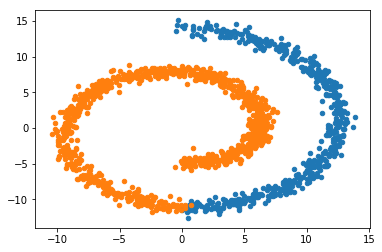

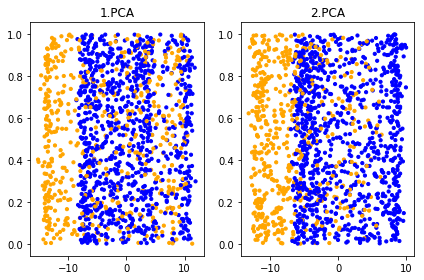

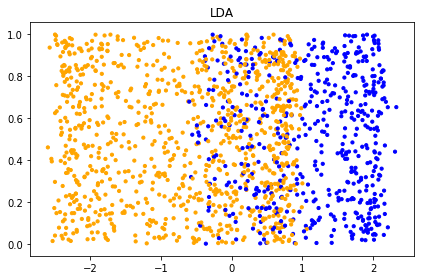

In [0]:
def genData():
    from sklearn.datasets import make_swiss_roll
    n_samples = 1500
    noise = 0.5
    X, t = make_swiss_roll(n_samples, noise)
    # Make it thinner
    fig = plt.figure()
    Data = np.zeros([1500, 2])
    Data[:, 0] = X[:, 0]
    Data[:, 1] = X[:, 2]
    Labels = np.zeros([1500, ])
    Labels[t > 11] = 1

    plt.scatter(Data[Labels == 1, 0], Data[Labels == 1, 1],
                s=20, )
    plt.scatter(Data[Labels == 0, 0], Data[Labels == 0, 1],
                s=20, )
    plt.show()
    return Data, Labels


data, labels = genData()
cov_matrix = np.cov(data.T)
eig_vals, eig_vecs = la.eig(cov_matrix)
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)

arr1 = np.asarray(eig_pairs[0][1])
arr2 = np.asarray(eig_pairs[1][1])

x1 = np.dot(arr1.T, data.T)
x2 = np.dot(arr2.T, data.T)
y = np.random.rand(1,1500)


plot1 = plt.subplot(1, 2, 1)
plot1.set_title('1.PCA')
plt.scatter(x1, y, s=10, c=['orange' if labels[i] == 1 else 'blue' for i in range(1500)])

plot2 = plt.subplot(1, 2, 2)
plot2.set_title('2.PCA')
plt.scatter(x2, y, s=10, c=['orange' if labels[i] == 1 else 'blue' for i in range(1500)])
plt.tight_layout()
plt.show()


lda1 = lda.fit(data, labels).transform(data)
plot = plt.subplot(1, 1, 1)
plot.set_title('LDA')
plt.scatter(lda1, y, s=10, c=['orange' if labels[p] == 0 else 'blue' for p in range(1500)])
plt.tight_layout()
plt.show()

# Part 2: Parametric and Non-Parametric Classification.

Download points2d.dat from https://www.cmpe.boun.edu.tr/~emre/courses/cmpe462/material/hws/hw2/points2d.dat. The sample includes 6000 instances. Each instance is represented by a feature vector of 2 dimensions. The third column corresponds to the class (0/1/2) of the instance.

## A: Mixture of Gaussians. 

Steps:
* Implement mixture of gaussians.
* Divide data to training and validation and test sets.
* At training:
    - Divide all data to their respective classes.
    - Run mixture of gaussians with k=1,2,3 using different initial points (the general practice is to use k-means to initialize the means, you can use sklearn implementation of k-means). 
* At validation, select best model:
    - Using validation data, select best number of gaussians for each class using prediction error.
* On test set, report (for the best model):
    - the number of Gaussians for class 0, 1 and 2,
    - the prediction error, and
    - the confusion matrix.

Best Model: class 0 --> k=2 class 1 --> k=2 class 2 --> k=3
Prediction error 0.345


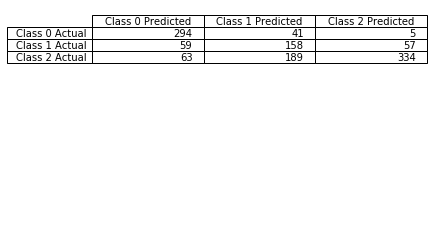

In [0]:
from sklearn.cluster import KMeans as kmeans

data = np.loadtxt('points2d.dat')
train = data[:3600]
validation = data[3600:4800]
test = data[4800:]

train0 = np.asarray([train[i][:2] for i in range(len(train)) if train[i][2] == 0])
train1 = np.asarray([train[i][:2] for i in range(len(train)) if train[i][2] == 1])
train2 = np.asarray([train[i][:2] for i in range(len(train)) if train[i][2] == 2])

converged = False;
threshold = 0.0001

def em(data, k):
    import sys
    global converged
    kms = kmeans(n_clusters=k)
    kms.fit(data)
    mean = kms.cluster_centers_
    pi = np.zeros(k)
    cov = np.zeros((k,2,2))
    for i in range(k):
      pi[i] = 1.0 / k 
      cov[i] = np.array([[1,0], [0,1]])
    loglikelihood = -sys.maxint - 1
    while not converged:
        r = e_step(data, k, pi, mean, cov)
        pi, mean, cov = m_step(data, k, r)
        if LogLikelihood(data, k, pi, mean, cov) - loglikelihood <= threshold:
            converged = True
        loglikelihood = LogLikelihood(data, k, pi, mean, cov)
    return pi, mean, cov

  
def e_step(data, k_, pi, mean, cov):
  r = np.zeros([k_,len(data)])
  for i in range(len(data)):
    temp = np.zeros(k_) 
    for k in range(k_):
      temp[k] = float(pi[k]) * gaussian(data[i], mean[k], cov[k])
    for k in range(k_):
      r[k][i] = temp[k]/float(np.sum(temp))
  return r


def m_step(data, k_, r):
  pi = np.zeros(k_)
  cov = np.zeros((k_,2,2))
  mean = np.zeros((k_,2))
  for k in range(k_):
    pi[k] = np.sum(r[k]) / float(np.sum(r))
    sum_ = np.zeros((2, 2))
    total = np.zeros_like(data[0])
    for i in range(len(data)):
      total += r[k][i] * data[i]
      sum_ += r[k][i] * np.dot((data[i]-mean[k]).reshape(1,2).T, (data[i]-mean[k]).reshape(1,2))
    mean[k] = total / float(np.sum(r[k]))    
    cov[k] = sum_ / float(np.sum(r[k]))
  return pi, mean, cov


def LogLikelihood(data, k, pi, mean, cov):
  log_likelihood = 0
  for x in data:
    temp = 0
    for c in range(k):
      r = pi[c] * gaussian(x, mean[c], cov[c])
      temp += r
      log_likelihood += np.log(temp)
  return log_likelihood


def gaussian(x, mean, cov):
    return 1 / pow((2 * np.pi), -1) * pow(abs(np.linalg.det(cov)), -1 / 2) * np.exp(-1 / 2 * np.dot(np.dot((x - mean).T, np.linalg.inv(cov)), (x - mean)))

def calculate_error(data, clusters):
  error = 0
  labels = []
  for i in range(len(data)):
    r = []
    for cluster in clusters:
      r.append(float(cluster[1]) * gaussian(data[i][:2], cluster[2], cluster[3]))
    label = int(clusters[r.index(max(r))][0])
    labels.append(label)
    if data[i][2] != label:
       error += 1
  return error / float(len(data)), labels


def PrintConfusionMatrix(labels, test_labels):
  matrix = np.array([[0,0,0], [0,0,0], [0,0,0]])
  for i in range(len(labels)):
    matrix[int(test_labels[i])][int(labels[i])] += 1
  columns = ['Class 0 Predicted', 'Class 1 Predicted', 'Class 2 Predicted']
  rows = ['Class 0 Actual', 'Class 1 Actual', 'Class 2 Actual']
  axs = plt.subplot()
  plt.table(cellText=matrix, rowLabels=rows, colLabels=columns, loc='best')
  axs.axis('off')
  plt.show()
  

model0 = []
model1 = []
model2 = []

for count in range(1,4):
    model0.append(em(train0, count))
    model1.append(em(train1, count))
    model2.append(em(train2, count))
    
errors = []
for i0 in range(3):
    for i1 in range(3):
        for i2 in range(3):
            clusters = [(0, model0[i0][0][i], model0[i0][1][i], model0[i0][2][i]) for i in range(i0+1)]
            clusters.extend([(1, model1[i1][0][i], model1[i1][1][i], model1[i1][2][i]) for i in range(i1+1)])
            clusters.extend([(2, model1[i2][0][i], model1[i2][1][i], model1[i2][2][i]) for i in range(i2+1)])
            err, _ = calculate_error(validation, clusters)
            errors.append((err, i0, i1, i2))

err, i0, i1, i2 = min(errors)


# Test
clusters = [(0, model0[i0][0][i], model0[i0][1][i], model0[i0][2][i]) for i in range(i0+1)]
clusters.extend([(1, model1[i1][0][i], model1[i1][1][i], model1[i1][2][i]) for i in range(i1+1)])
clusters.extend([(2, model1[i2][0][i], model1[i2][1][i], model1[i2][2][i]) for i in range(i2+1)])
err, labels  = calculate_error(test, clusters)

print('Best Model: class 0 --> k=' + str(i0 + 1) + ' class 1 --> k=' + str(i1 + 1) + ' class 2 --> k=' + str(i2 + 1))
print('Prediction error ' + str(err))

PrintConfusionMatrix(test.T[2],labels)


## B: K-Nearest Neighbor
Steps:
* Implement k-nearest neighbor. 
* Run it with k=1,10,40. 
* Using test set, Report
    - best k,
    - prediction error for all k’s.
    - confusion matrix for all k’s.

Best k = 40
Error k=1: 0.334167


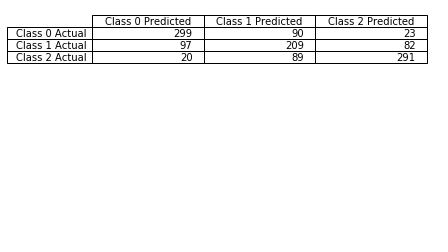

Error k=10: 0.266667


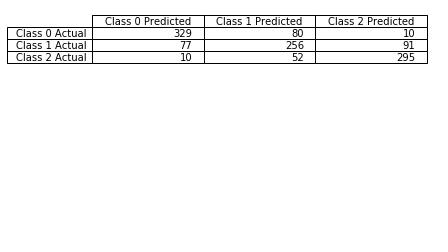

Error k=40: 0.249167


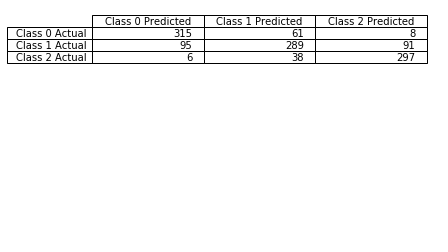

In [0]:
def K_Nearest_Neighbor(train, test, k):
  error = 0
  labels_test = []
  for data in test:
    dist_list = []
    for data_i in train:
      dist_list.append(((np.linalg.norm(np.asarray(data[:2]) - np.asarray(data_i[:2])), int(data_i[2]))))
    dist_list.sort(key=lambda x: x[0])
    dist_list = dist_list[:k]
    class_num = [0, 0, 0]
    for dist in dist_list:
      class_num[int(dist[1])] += 1
    label = class_num.index(max(class_num))
    labels_test.append(label)
    if int(data[2]) != label:
      error += 1.0
  error = error / len(labels_test)
  return labels_test, error

  
knn_1 = K_Nearest_Neighbor(train, test, 1)
knn_10 = K_Nearest_Neighbor(train, test, 10)
knn_40 = K_Nearest_Neighbor(train, test, 40)
print('Best k = 40')
test_labels = [int(test[i][2]) for i in range(len(test))]
print('Error k=1: %f' % knn_1[1])
PrintConfusionMatrix(test_labels, knn_1[0])
print('Error k=10: %f' % knn_10[1])
PrintConfusionMatrix(test_labels, knn_10[0])
print('Error k=40: %f' % knn_40[1])
PrintConfusionMatrix(test_labels, knn_40[0])

